In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
descriptive_prompt_6 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time. 6. Compute the SASA (solvent accessible surface area)."
non_descriptive_prompt_6 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD, SASA, and radius of gyration of the simulation."

Required Tasks:
- Download
- SS Analysis
- Simulation
- RMSD
- Rgy
- SASA

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_6)

Thought: To complete all the tasks, I'll need to use several tools in sequence. Let's start with downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's analyze the structure to determine the number of residues in the chains and beta sheets.

Action:
```
{
    "action": "GetTurnsBetaSheetsHelices",
    "action_input": "1LYZ"
}
```Thought: I apologize for the confusion in my previous approach. It seems the GetTurnsBetaSheetsHelices tool didn't provide the information we need. Let's try a different approach to get the structural information we're looking for. We'll use the SummarizeProteinStructure tool to get an overview of the protein structure.

Action:
```
{
    "action": "SummarizeProteinStructure",
    "action_input": {
        "traj_file": "1LYZ_184320",
        "top_file": "1LYZ_184320"
    }
}
```Thought: We've

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [6]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_184320: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_184320
 1LYZ_184339: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_184344: Initial positions for simulation sim0_184344
 sim0_184344: Basic Simulation of Protein 1LYZ_184339
 rec0_184344: Simulation trajectory for protein 1LYZ_184339 and simulation sim0_184344
 rec1_184344: Simulation state log for protein 1LYZ_184339 and simulation sim0_184344
 rec2_184344: Simulation pdb frames for protein 1LYZ_184339 and simulation sim0_184344
 rmsd_184344: RMSD for 184344
 fig0_184412: RMSD plot for 184344
 rgy_rec0_184344: Radii of gyration per frame for rec0_184344
 fig0_184414: Plot of radii of gyration over time for rec0_184344
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_184452: Plot of SASA over time for 1LYZ


In [7]:
traj_path = registry.get_mapped_path("rec0_184344")
top_path = registry.get_mapped_path("top_sim0_184344")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path("rmsd_184344"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_184344"))
assert os.path.exists(registry.get_mapped_path("sasa_1LYZ"))
path = registry.get_mapped_path("1LYZ_184320")
traj = md.load(path)
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  2
Number of sheets:  14
Number of helices:  50
Number of coils:  65


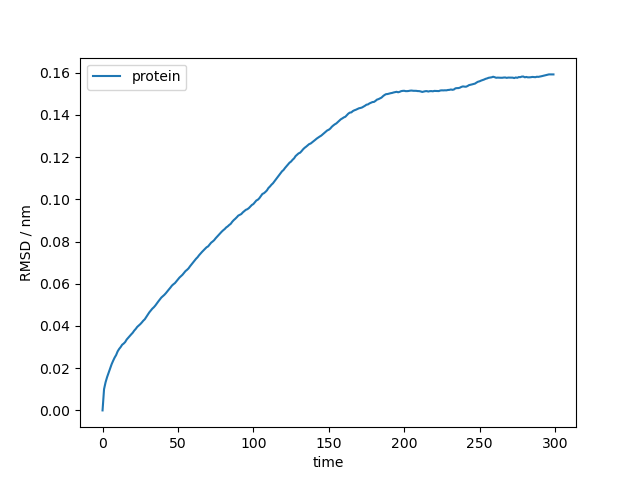

In [8]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_184412'))

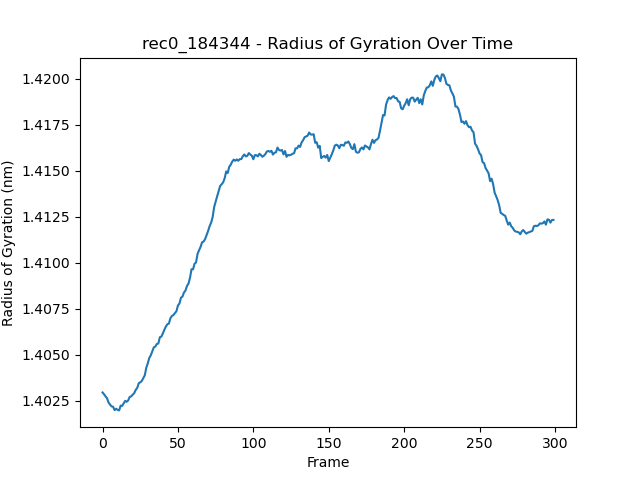

In [10]:
#plot rgy
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_184414'))

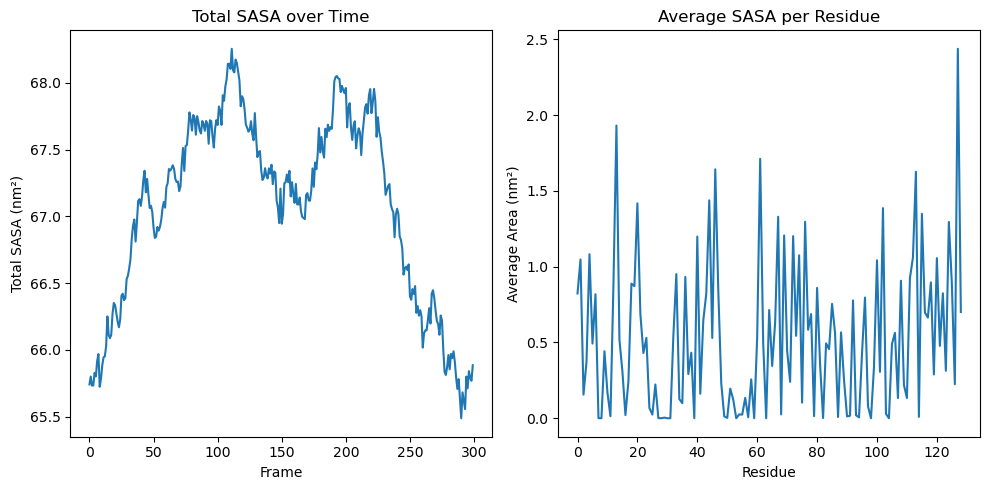

In [11]:
#plot sasa
Image(filename=registry.get_mapped_path('fig0_184452'))

In [12]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_6)

Thought: To answer this question, we need to follow several steps. First, we'll download the PDB file for 1LYZ, set up and run a simulation, and then analyze the results. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run a short simulation for 1 ps at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_184958",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [13]:
registry = agent_2.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_184958: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_184958
 1LYZ_185008: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_185013: Initial positions for simulation sim0_185013
 sim0_185013: Basic Simulation of Protein 1LYZ_185008
 rec0_185013: Simulation trajectory for protein 1LYZ_185008 and simulation sim0_185013
 rec1_185013: Simulation state log for protein 1LYZ_185008 and simulation sim0_185013
 rec2_185013: Simulation pdb frames for protein 1LYZ_185008 and simulation sim0_185013
 rec0_185052: dssp values for trajectory with id: rec2_185013
 rmsd_185013: RMSD for 185013
 fig0_185055: RMSD plot for 185013
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_185130: Plot of SASA over time for 1LYZ
 rgy_rec0_185013: Radii of gyration per frame for rec0_185013
 fig0_185133: Plot of radii of gyration over time for rec0_185013


In [14]:
traj_path = registry.get_mapped_path("rec0_185013")
top_path = registry.get_mapped_path("top_sim0_185013")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path("rmsd_185013"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_185013"))
assert os.path.exists(registry.get_mapped_path("sasa_1LYZ"))
path = registry.get_mapped_path("1LYZ_184958")
traj = md.load(path)
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  2
Number of sheets:  14
Number of helices:  50
Number of coils:  65


In [22]:
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(path_registry=agent_2.path_registry)
dssp._run(traj_file= "rec2_185013", top_file= "top_sim0_185013", target_frames= "last")

"{'residues in helix': 42, 'residues in strand': 12, 'residues in coil': 75, 'residues not assigned, not a protein residue': 0}"

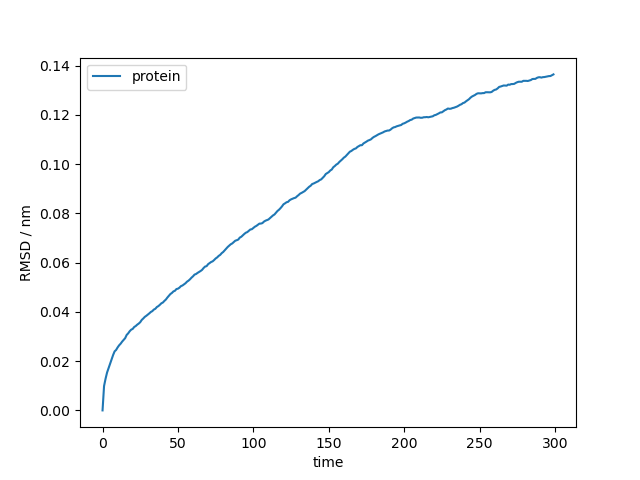

In [15]:
#rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_185055'))

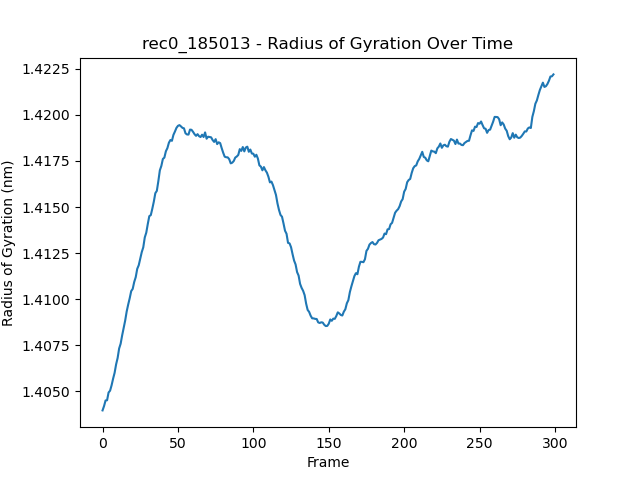

In [17]:
#rgy
Image(filename=registry.get_mapped_path('fig0_185133'))

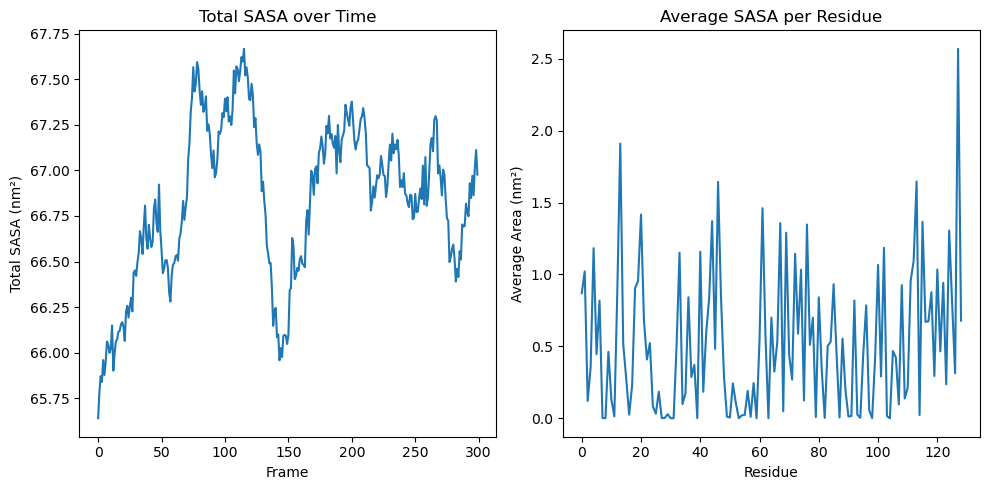

In [18]:
#sasa
Image(filename=registry.get_mapped_path('fig0_185130'))